# Matplotlib and Seaborn: Fiddly, beautiful plots

Matplotlib is generally regarded as *the* major plotting library in Python, and for good reason.  It is extremely flexible, it gives you a *lot* of extremely fine-grained control, and it can make very professional-looking, high-resolution plots.

But it is extremely fiddly; that's the downside of its flexibility.  And it can be kind of slow; that's the downside of being able to make professional, high-quality plots.  And it doesn't really do much for you by default; that's the downside of its customizeability.  It expects you to do a bit more legwork.  In some ways, Matplotlib is more like a general-purpose image drawing library that's got some presets for plotting and data visualization, rather than being explicitly a data visualization library.

Seaborn is a closely related library that builds on top of Matplotlib and gives you access to a few kinds of useful plots that Matplotlib doesn't support out of the box, like density plots, clustered histograms, etc.  Matplotlib is designed for extremely general-purpose plotting; Seaborn is kind of an "add-on" that gives you plots for statistics and data analysis.

Those of you coming from R will have almost certainy used `ggplot2`.  `ggplot2` is an amazing library that generated gorgeous plots, very easily.  Matplotlib will feel like an unnecessarily difficult and cantankerous beast coming from `ggplot2`, but that's because it's trying to do something fundamentally different.  `ggplot2` provides sensible default plot annotations, easy interfaces to pretty high-level/complex plotting styles and layouts, and generally tried--and succeeds--at making it as easy as possible to generate a lot of pretty standard kinds of plots.  Matplotib is "lower level" in some ways; it might take more work to generate a 2x2 grid of scatterplots, but once you know how to do that, you could generate any kind of grid you want.  3x6, 3x3 but with the middle column empty, 3x3 but with the bottom 2x3 section all reserved for one plot, and more.

There are a *lot* of plotting libraries in Python, most of which we won't cover.  Here's a quick rundown of the most useful ones to know about:
- `bokeh` generates plots that you can embed in a browser.  It builds the plots using Javascript, and gives you a lot of very easy interactivity.  Matplotlib, by contrast, focuses on generating static plots.
- `plotly` is a good general alternative to `bokeh`, and it makes some more specialized kinds of plots a lot easier to do.  Especially plots that are for less data-oriented fields, e.g., geographic plots.  `plotly` is also produced by a large company, and it integrates well into some of their other tools.  It's a good option for dashboards.
- `ggplot` is a Python re-implementation of R's `ggplot2`.
- And a bunch of others: `pygal` and `altair` are probably the two biggest right now.

At the end of the day, it doesn't matter a whole lot what library you use for data visualization, as long as you're comfortable with it.  This is especially true in recent years.  Not that long ago, Matplotlib was the only library that was really usable for high-quality, production-level visualization.  In the past few years, though, there have been a lot more libraries popping up and really diversifying the landscape. But Matplotlib is still the *lingua franca,* and the best-established library by far.

This notebook will focus on Matplotlib.  It's an unreasonably large library, and the documentation can be hard to navigate at first, but once you get over the initial learning curve it will let you do a *lot*.  It also integrates nicely with notebooks like this one.

Intall Matplotlib and Seaborn with:
```bash
conda intall matplotlib seaborn
```

# Rapid-fire overview

Let's build up a simple scatterplot.

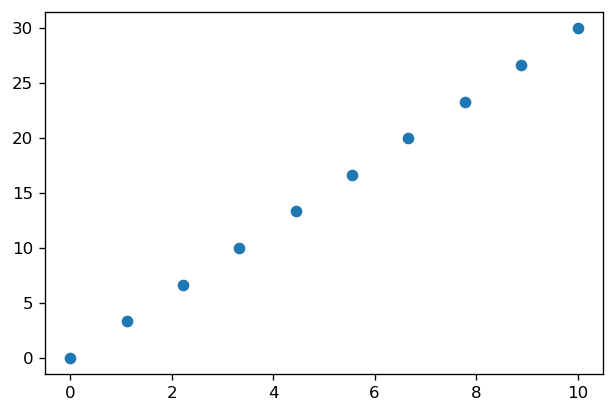

In [31]:
import numpy as np

# pyplot is the module within matplotlib that has all the plotting commands.
# It is essentially always imported using this alias.
import matplotlib.pyplot as plt

# Importing just Matplotlib is usually how you'll go about changing default/
# global settings in the library, often by accessing the mpl.rcParams dictionary
# and changing values there.  I'm changing the default DPI to 120 so all the plots
# show up larger in this notebook.  This can always be overridden on a per-plot
# basis.
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 120

# get our sample data
x = np.linspace(0, 10, 10)
y = 3*x

# We'll break down these lines in a minute.
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

First off, let's note a few things about this plot before we dissect those three surprisingly dense lines of code.

1. There is no title, no label on the X axis, no label on the Y axis, basically nothing to tell us what this plot is.
2. It's a fairly plain plotting style.  Light blue dots on a plain background, without a lot of extra annotations.

Number 1 is definitely a problem, and one we'll fix in a moment.  Number 2 is a matter of style and preference.  I have come to really like the simple, less cluttered plotting styles like this, especially when I'm just trying to quickly eyeball some data as part of data exploration.  

Let's break down those three lines of code now.

```python
fix, ax = plt.subplots()
```

This line has the most going on in it.  `plt.subplots()` is a function that does a lot of basic image setup for us.  It:

1. Create the `Figure` that our plot, titles, etc get saved in.  
    - `Figure`s in Matplotlib are *the whole image* that gets created, of which the plot is just one part.  The `Figure` also stores information--if we provide it--about things like the size of the image, the DPI of the image, and other metadata.
2. Creates a single `subplot` within that image.
    - A `subplot` is just a dedicated area of the image where we can create a plot.  An image with a single subplot is, conceptually, not much different from "just a plot."  But an image may have multiple subplots, e.g., if you want to have two plots side-by-side in the same image.  (you might have used `panelby` arguments in `ggplot2` that do this same sort of thing).
    - We could pass some arguments to `plt.subplots()` to make it generate, say, a 2x2 grid of 
3. Adds `Axes` to the subplot.
    - An `Axis` in matplotlib is just the area of the figure where the plot goes, e.g., the scatterplot.  Some things in the `Figure` are outside of the `Axes`, but almost everything we're going to add to our plots will go through the `Axis` objects..
    - The `Axis` objects are the way you usually do your plotting and annotations.
4. Returns the `Figure` object and the `Axis` that was added to it.
    - We can now call different `Figure` and `Axis` methods to make changes to our plots.

When we call `ax.scatter()`, we're telling Matplotlib to draw a scatterplot in the `Axis` object `ax`, which is going to be the one in the figure we just created.  Every time you create a new `Figure`, it gets its own set of axes you can address individually.  These `Axis` objects have a lot of different plotting method: line plots (`ax.plot()`), histograms (`ax.hist()`), bar plots (`ax.bar()`), and a whole lot more we won't be seeing in too much detail today.

Lastly, `plt.show()` just says "show any `Figure`s that have been created."  Normally, this will open a new window with the plot in it.  But since this code is running in a Jupyter Notebook right now, Jupyter intercepts the "open a new window" part of that instruction and instead sticks the plot right below the code cell.

Okay, that's admittedly a lot of information to cram into three lines.  And some of it is kind of...esoteric, to put it kindly.  But if you just remember the basic formula from above, you'll be good enough to get started:

```python
fig, ax = plt.subplot()
# call `ax` methods to generate a kind of plot
plt.show()
```

Now, let's add some proper labels to the plot.

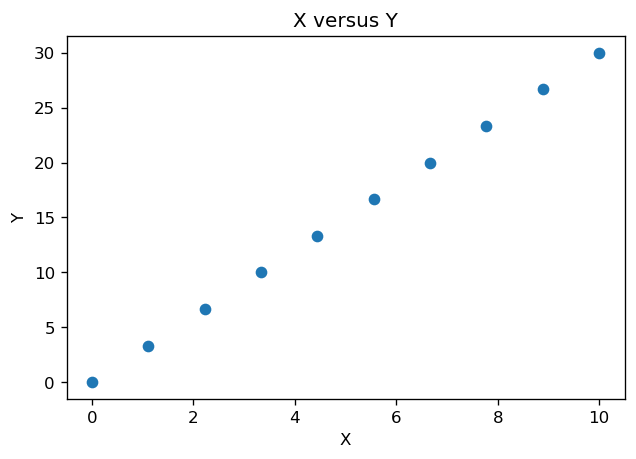

In [32]:
fig, ax = plt.subplots()
ax.scatter(x, y)

# Add a plot title
ax.set_title("X versus Y")

# Add labels to the X and Y axes
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()

We can change the kind of plot by changing the method we call on `ax`.

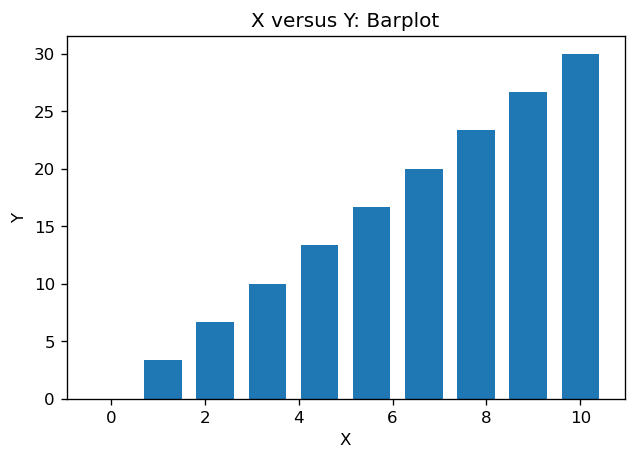

In [33]:
fig, ax = plt.subplots()
# ax.bar -> bar plot
ax.bar(x, y)
ax.set_title("X versus Y: Barplot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

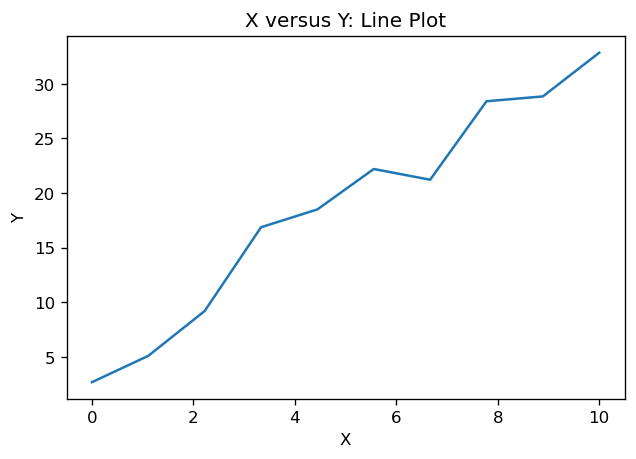

In [34]:
fig, ax = plt.subplots()
# ax.plot -> line plot.  We'll add a bit of noise to `y to make
# this a bit clearer.
rng = np.random.default_rng()
ax.plot(x, y + rng.random(size=10)*10)
ax.set_title("X versus Y: Line Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

# Some additional tweaks

We can change *eveything* about the above plot.  But most of the time, we only want to change a few things.  Like:

- The color of the plotted data.  Use the `color=` argument to most of the `ax` methods.  (sometimes `c=` in older functions/methods).
- The scale of the image.  Add the `figsize=(height_in_inches, width_in_inches)` argument to `plt.subplots()`.
- The ticks along the x and y axes.  Use the `ax.set_xticks()` and `ax.set_yticks()` methods.
- Turn off the box that's drawn around the plot area.  Use the `ax.set(frame_on=False)`.  (`ax.set()` has a lot of general-purpose/miscellaneous settings you can change).
- Set the axes to have equal aspect ratio, rather than auto-scaling.  Use `ax.set(aspect="equal")`.
- Manually specify a minimum and maximum x/y value, rather than letting Matplotlib figure this out for you.  Use `ax.set_xlim()`/`ax.set_ylim()`.
- Change fonts, colors, font size, etc. for titles/labels.  Use keyword arguments, e.g. `fontsize=`, inside `ax.set_title()`/`ax.set_xlabel()`/etc.

Showing a few of these changes together:

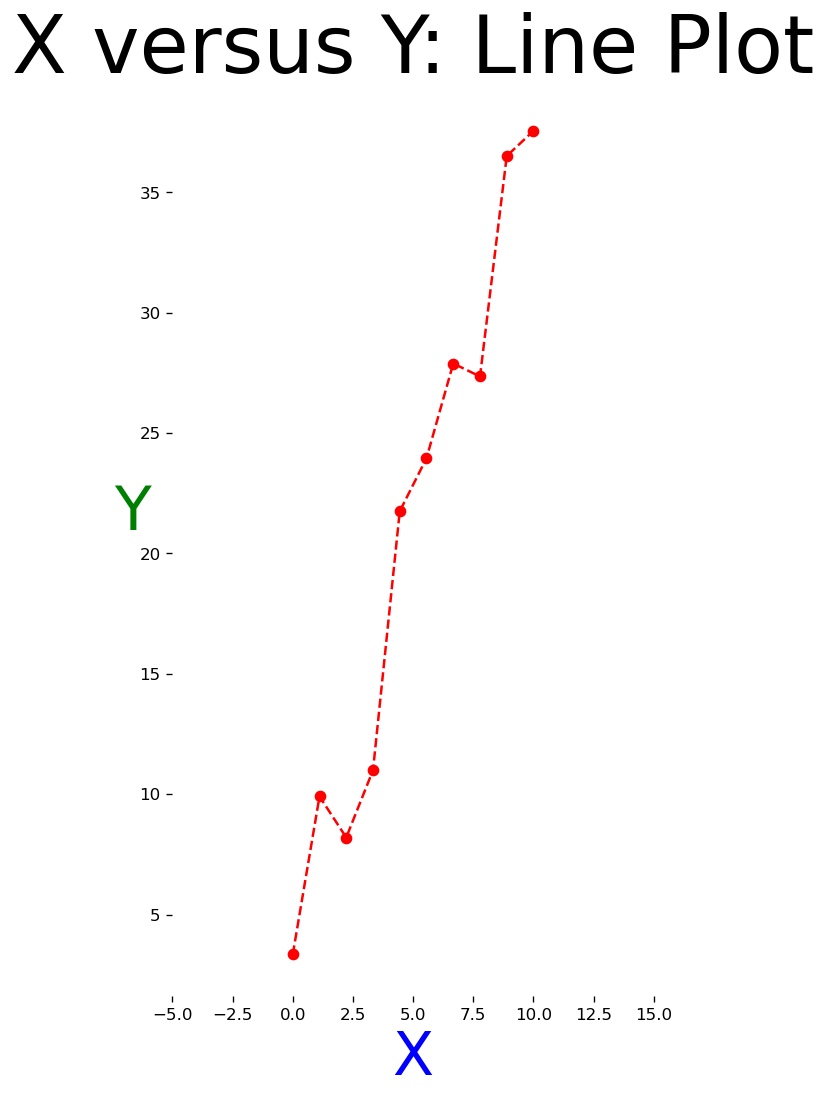

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
# ax.plot -> line plot.  We'll add a bit of noise to `y to make
# this a bit clearer.
rng = np.random.default_rng()
ax.plot(
    x,
    y + rng.random(size=10)*10,
    # red line.  Can specify a few colors by name, or you can specify
    # hexadecimal/RGB/a few other kinds of values
    color="red",
    
    # dashed line
    linestyle="--",
    
    # markers at each point
    marker="o",
)
ax.set_title(
    "X versus Y: Line Plot",
    # BIG font!
    fontsize=48,
)
ax.set_xlabel(
    "X",
    fontsize=36,
    color="blue",
)
ax.set_ylabel(
    "Y",
    fontsize=36,
    color="green",
    # Let's rotate this so it's vertical, not horizontal.
    # Default rotation is 90 for y-axis labels.
    rotation=0,
)

# turn the box off, but leave axis ticks in place
ax.set(frame_on=False)

# change the range of x values displayed.
# `ax.set_xlim([min_value, max_value])`
ax.set_xlim([-5, 15])

# Equal aspect ratio.  1 pixel in the X and Y direction now mean the same
# change in X and Y values.
ax.set(aspect="equal")

plt.show()

Okay, so that plot is...ugly.  But it shows that we can make a *lot* of changes.  A lot of the changes we want to make are just one method call with an argument or two.

For a lot of simpler graphs, it really is as easy as this.  But for more complex graphs, it can get a lot less trivial--you will end up doing a lot more work to get a graph to look *just right* when you start adding more elements, or needing to worry about more fine-grained adjustments.  But, you can always make those adjustment; Matplotlib never walls anything off from you.

# Saving plots

Saving plots is easy--and not something that ever really gets more complex.  Just use `fig.savefig("filename")`.  Pick your extension of choise--.png, .jps, .svg, .pdf, .eps--Matplotlib will generally handle them all for you.  If you want higher resolutions, specify `dpi=`.  The default is 120 dpi; fine for most things, but maybe too low for other use cases.

Note: be sure to call this BEFORE calling `plt.show()`!  `plt.show()` will delete the figure after it runs!

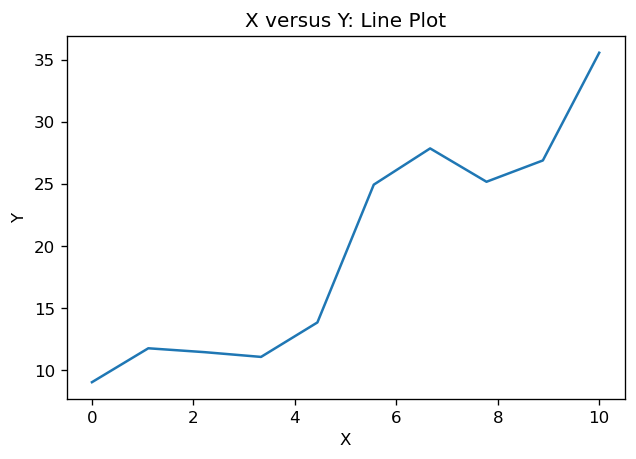

In [36]:
fig, ax = plt.subplots()
rng = np.random.default_rng()
ax.plot(x, y + rng.random(size=10)*10)
ax.set_title("X versus Y: Line Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")

fig.savefig("Best Plot Ever!!!.png", dpi=120)
plt.show()

## Subplots: multiple plots in one figure

Subplots in Matplotlib are (fairly) easy.  Just give a `nrow=` and `ncol=` argument to `plt.subplots()`, and you'll get back a Numpy array of `Axis` objects: one per subplot in your figure.

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


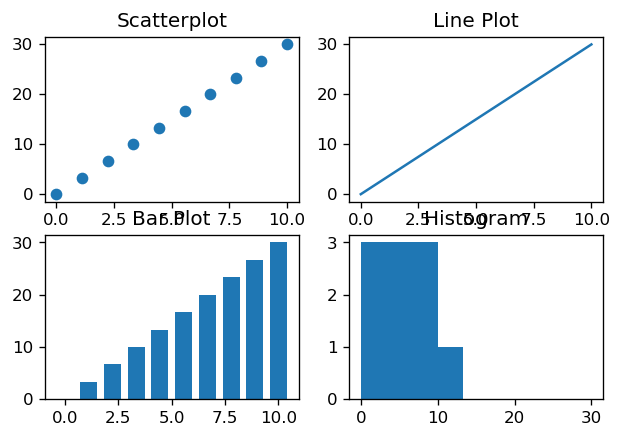

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2)
print(axes)

axes[0, 0].scatter(x, y)
axes[0, 0].set_title("Scatterplot")

axes[0, 1].plot(x, y)
axes[0, 1].set_title("Line Plot")

axes[1, 0].bar(x, y)
axes[1, 0].set_title("Bar Plot")

axes[1, 1].hist(x, y)
axes[1, 1].set_title("Histogram")

plt.show()

Note how, in the embedded image above, a lot of plot elements overlap.  This is one of the ways Matplotlib does not really hold your hand.  It does not, usually, do anything to smartly reize your plots, subplots, or really anything to make sure it looks nice.  Fortunately, in the case of subplots, we can use `fig.tight_layout()` to make sure that no elements from any subplot overlap with any other subplot.  Sometimes this means we have to tweak our figure size, though, to make it look nice; this is one of the ways Matplotlib can be kind of fiddly.  We won't have to do that in this example, but in some plots, `fig.tight_layout()` can lead to ugly and squished plots--especially if different plots are showing different datasets, and thus, might have different scales.

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


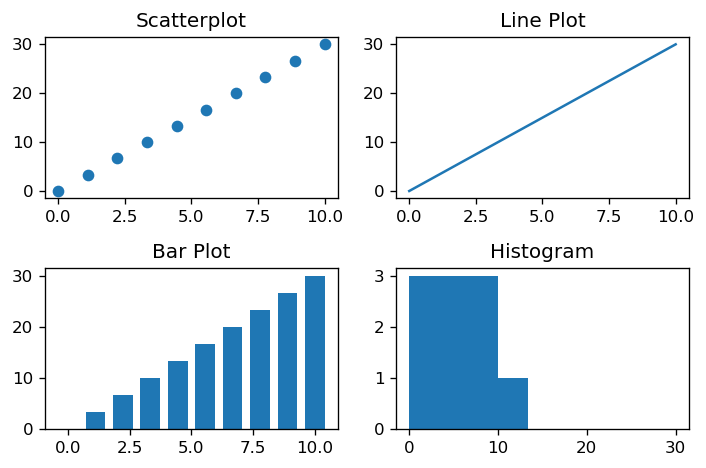

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2)
print(axes)

axes[0, 0].scatter(x, y)
axes[0, 0].set_title("Scatterplot")

axes[0, 1].plot(x, y)
axes[0, 1].set_title("Line Plot")

axes[1, 0].bar(x, y)
axes[1, 0].set_title("Bar Plot")

axes[1, 1].hist(x, y)
axes[1, 1].set_title("Histogram")

fig.tight_layout()
plt.show()

About the only two fancy things we might want to do with subplots is:

1. Make multiple subplots share the same x/y axes.  To do this, we have to pass `sharex=` and/or `sharey=` arguments to `plt.subplots()`.  This can get confusing for complex `Figure`s--but usually, that's a sign that you should probably use multiple simpler, independent `Figure`s.
2. Makeone plot take up several "spots" in the grid.  E.g., have two half-width plots on top, and one full-width-half-height plot on the bottom.

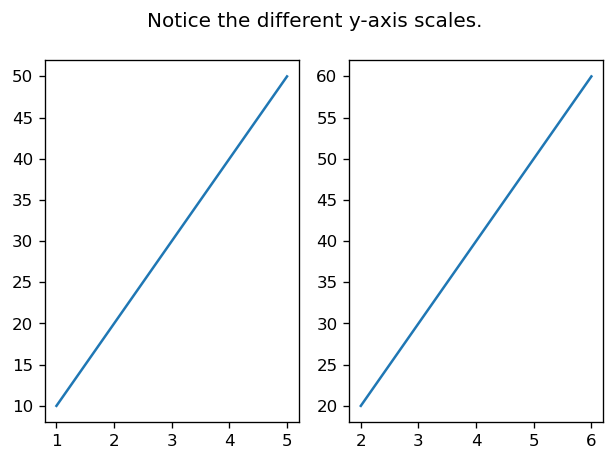

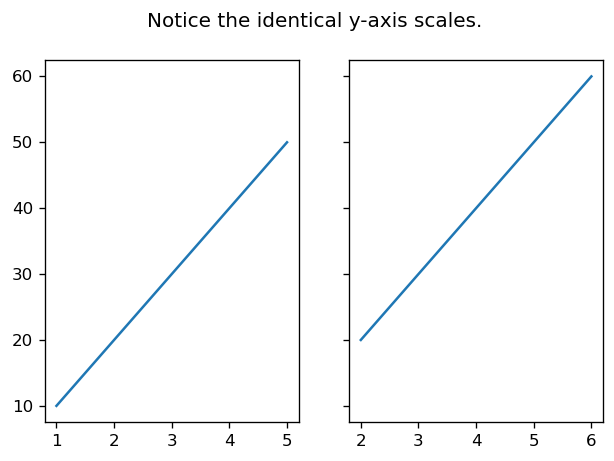

In [39]:
fig, axes = plt.subplots(ncols=2)
axes[0].plot(
    [1, 2, 3, 4, 5],
    [10, 20, 30, 40, 50]
)
axes[1].plot(
    [2, 3, 4, 5, 6],
    [20, 30, 40, 50, 60],
)
fig.suptitle("Notice the different y-axis scales.")
plt.show()

# Same code as before--just with `sharey=True` in `plt.subplot()`.
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].plot(
    [1, 2, 3, 4, 5],
    [10, 20, 30, 40, 50]
)
axes[1].plot(
    [2, 3, 4, 5, 6],
    [20, 30, 40, 50, 60],
)
fig.suptitle("Notice the identical y-axis scales.")
plt.show()

# Plotting multiple series

Let's say we have multiple data series we want to plot.  We could use subplots, but we might want the two series plotted in the same plot area.  Matplotlib makes this very, very easy to do.  Just make additional calls to the `Axis` plotting methods, and each successive call with draw the new plot on top of the existing plot area.  Matplotlib will also automatically cycle through colors for each series you plot.

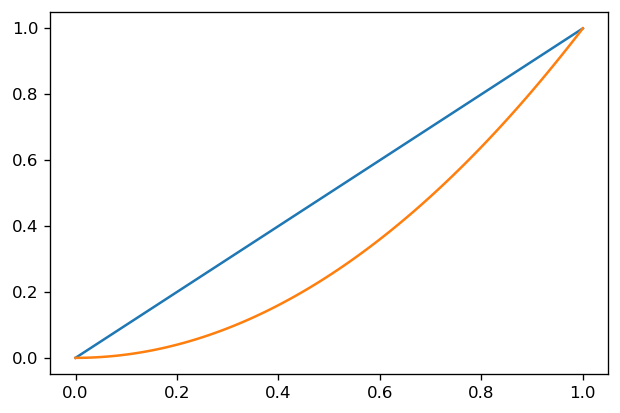

In [40]:
x = np.linspace(0, 1, 100)
y1 = x
y2 = x**2

fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
plt.show()

What if we want to add a legend?  We just add a `label=` to the plotting method calls, then call `ax.legend()`.  We can pass arguments to `ax.legend()`, e.g. to control the location of the legend box, but in a lot of cases Matplotlib will put it in a sensible spot.

Or, instead of using `label=`, we could pass `ax.legend()` a list of values to use as text in the legend.  The first item in the list is the first thing plotted, the second item in the list is the second thing plotted, etc.

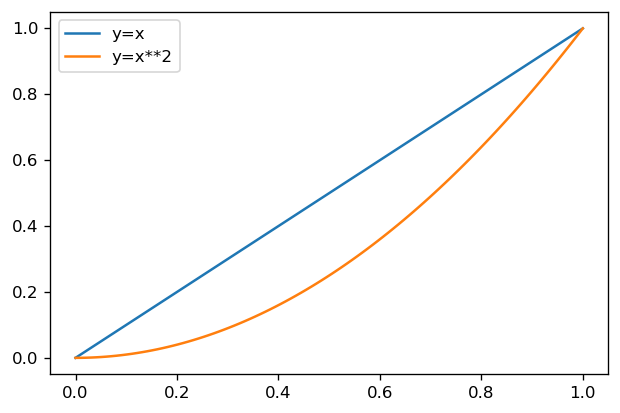

In [41]:
fig, ax = plt.subplots()
ax.plot(x, y1, label="y=x")
ax.plot(x, y2, label="y=x**2")
ax.legend()
plt.show()

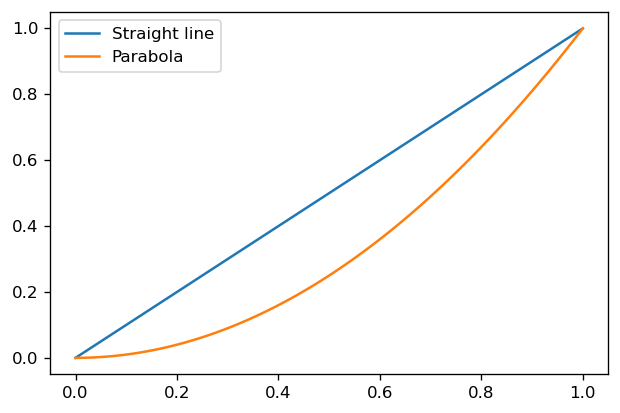

In [42]:
# Explicitly passing labels
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.legend(["Straight line", "Parabola"])
plt.show()

We can also mix and match plot styles with no special code needed.  Every time you call a plotting method on an `Axis` object, it generates the appropriate image data and then adds it as a new "layer" on top of the image.  So, as far as that process is concerned, there's absolutely nothing stopping you from mixing and matching plots to your heart's content!  The only caveat here--other than "be careful you don't make an unreadable mess of a plot"--is that Matplotlib will only automatically cycle colors *within the same plot type.*  So if you take the `color=` arguments out of the code below, everything will be the same shade of blue, because colors are only automatically cycled *within the same plot type.*

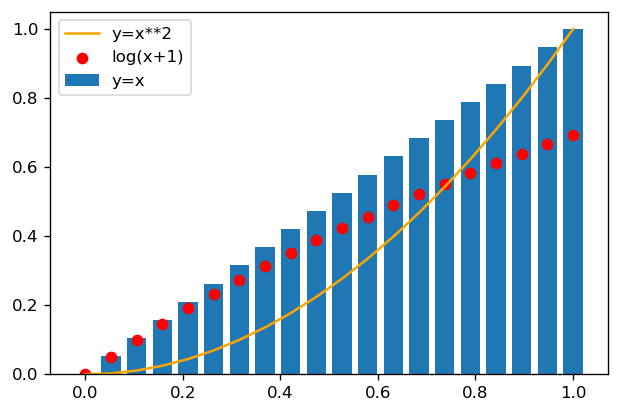

In [53]:
x = np.linspace(0, 1, 20)
y1 = x
y2 = x**2
y3 = np.log1p(x)

fig, ax = plt.subplots()
ax.bar(x, y1, label="y=x", width=0.04)
ax.plot(x, y2, label="y=x**2", color="orange")
ax.scatter(x, y3, label="log(x+1)", color="red")
ax.legend()
plt.show()

# Miscellaneous Matplotlibery

You can use `fig.clf()` to clear a `Figure` object, removing everything you've added to it--including the `Axis` and subplots you might have created.  This can be useful if you're generating a lot of plots and saving them to image files, since it will re-use the same `Figure` but "reset" it each time.  Sometimes, especially with large, high-DPI images, it can be slow to generate a new `Figure`.  This usually is not a problem though in my experience.

C:\Users\andersonh\AppData\Local\Temp\ipykernel_13044\2243158013.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


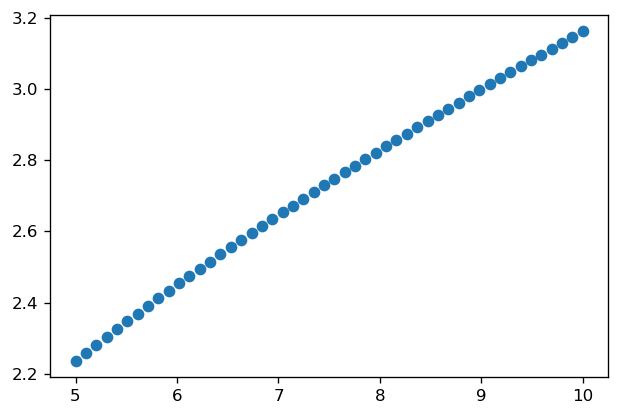

In [62]:
fig, ax = plt.subplots()
ax.bar(x, y1, label="y=x", width=0.04)
ax.plot(x, y2, label="y=x**2", color="orange")
ax.scatter(x, y3, label="log(x+1)", color="red")
ax.set_xlim([0, 1])
ax.legend()

# clear the figure--removes and resets EVERYTHING you've done
# to the `Figure`.
fig.clf()
# need to re-add subplots
ax = fig.add_subplot()
ax.scatter(np.linspace(5, 10, 50), np.sqrt(np.linspace(5, 10, 50)))
plt.show()

You can also explicitly close a `Figure` when you're done with it.  This happens by default after you use `plt.show()`, but it does NOT happen by default after using `fig.savefig()`.  If you have too many `Figure`s open at once, Matplotlib might start giving you warnings, and things might start slowing down a bit.

Close figures with `plt.close(fig)`, where `fig` is the figure object you want to close.  Or, use `plt.close("all")` to close every currently open figure.  If you don't pass any arguments--you just use `plt.close()`--Matplotlib closes whatever the last figure is that you did something to.  (Sort of--it's actually the *active figure,* but this is a holdover from an older API that you should generally avoid using; always pass the figure you want to close, for clarity's sake, and to avoid possible bugs).

In [67]:
fig, ax = plt.subplots()
ax.plot(np.arange(10), np.arange(10))
plt.close(fig)
plt.show() # nothing to show

Different kinds of plots have a lot of different options, but the one I find most useful is usally `alpha`.  This changes the transparency levels of your data, which I find extremely useful for scatterplots with lots of data in them.  But, picking the right alpha level for best visibility can require a bit of trial-and-error.

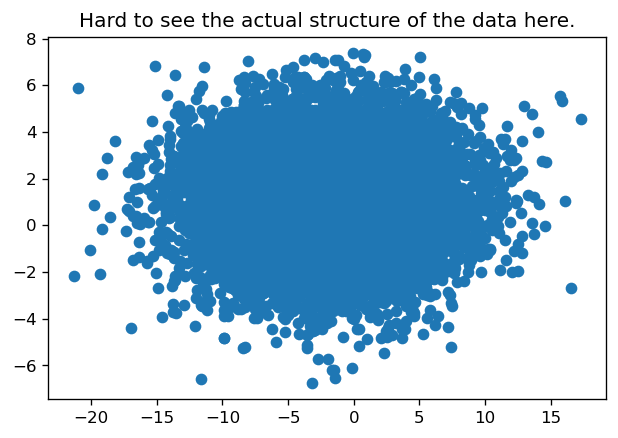

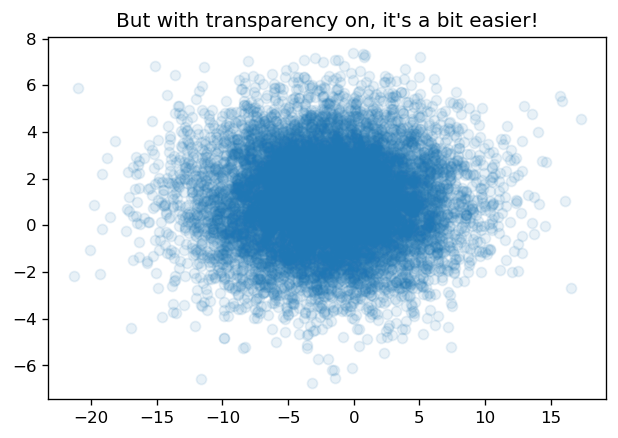

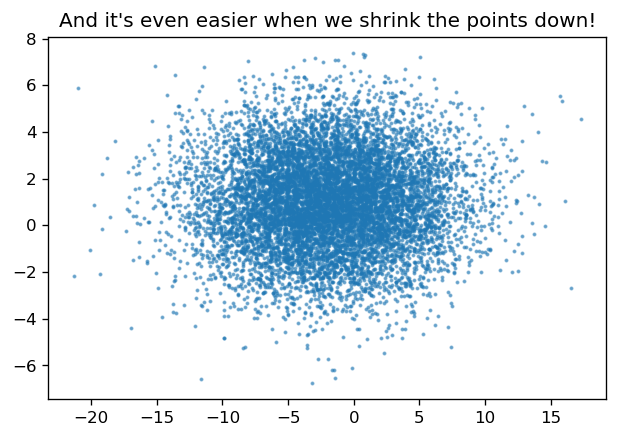

In [77]:
rng = np.random.default_rng()
x = rng.normal(loc=-2, scale=5, size=10000)
y = rng.normal(loc=1, scale=2, size=10000)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_title("Hard to see the actual structure of the data here.")
plt.show()

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.1)
ax.set_title("But with transparency on, it's a bit easier!")
plt.show()

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, s=2)
ax.set_title("And it's even easier when we shrink the points down!")
plt.show()

(but really, for data like this, just use a 2d histogram)

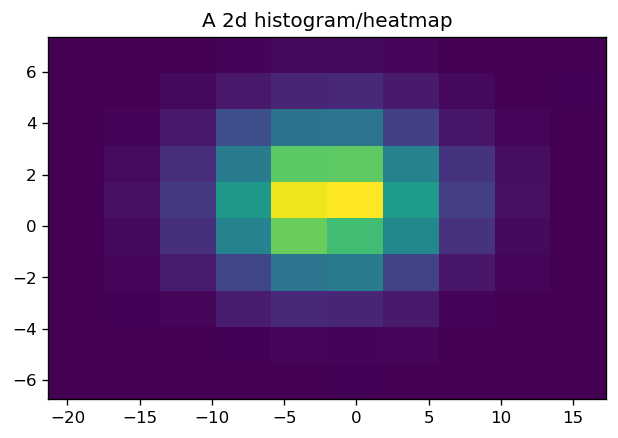

In [86]:
fig, ax = plt.subplots()
ax.hist2d(x, y)
ax.set_title("A 2d histogram/heatmap")
plt.show()

# A digression: Matplotlib's many APIs

Matplotlib actually has two different APIs for plotting.  The one we've been using is the *object-oriented* API: you create a `Figure` and `Axis`, and you call methods on those objects to do stuff.  But there's also the older *imperative API*, where you call Matplotlib functions directly to generate plots.  We haven't touched the imperative API because it can get a bit messy; you create a figure, but sometimes Matplotlib does this for you; that figure gets set as the "active" `Figure`, and any plotting calls automatically update that `Figure`, until you do something to change which `Figure` is active.  It's not that messy in practice, but it can get a bit harder to keep track of if you have multiple plots being created at once.

Here's a quick side-by-side of both APIs, generating exactly the same plot.

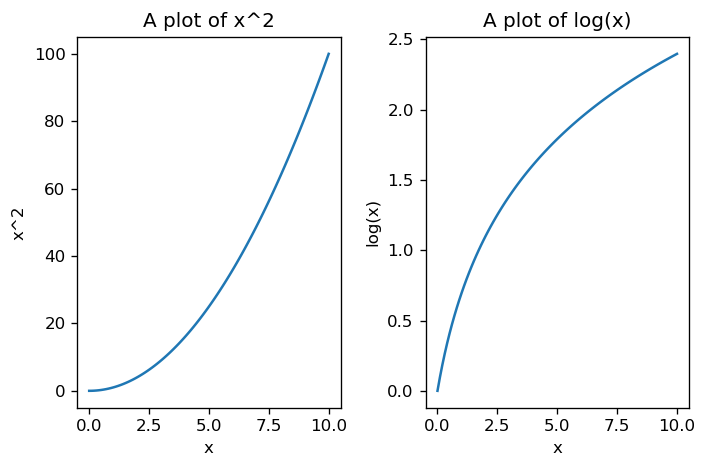

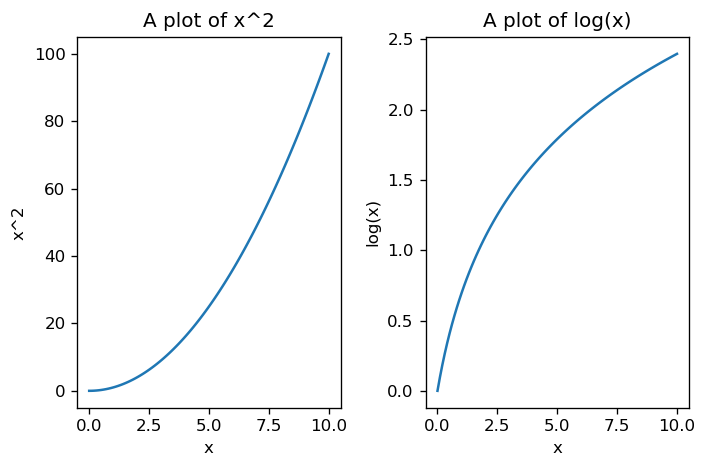

In [95]:
x = np.linspace(0, 10, 100)

# Object oriented API--like we've been using.
fig, ax = plt.subplots(ncols=2)
ax[0].plot(x, x**2)
ax[0].set_title("A plot of x^2")
ax[0].set_xlabel("x")
ax[0].set_ylabel("x^2")
ax[1].plot(x, np.log1p(x))
ax[1].set_title("A plot of log(x)")
ax[1].set_xlabel("x")
ax[1].set_ylabel("log(x)")
fig.tight_layout()
plt.show()

# Basic imperative API--automatically creating a new Figure,
# setting it as active, and writing to it.
# select subplot: 1 row, 2 columns, plot 1
plt.subplot(1, 2, 1)
plt.plot(x, x**2)
plt.title("A plot of x^2")
plt.xlabel("x")
plt.ylabel("x^2")
plt.subplot(1, 2, 2)
plt.plot(x, np.log1p(x))
plt.title("A plot of log(x)")
plt.xlabel("x")
plt.ylabel("log(x)")
plt.tight_layout()
plt.show()

It doesn't ultimately matter which API you use.  I personally like the object-oriented API, but I go back and forth between them.  They both generate exactly the same images, just with slightly different user-facing code.  So just use whichever one you happen to like best.

# Seaborn: Matplotlib extensions for statistical and data plotting

Seaborn is basically a set of extensions to Matplotlib, available as a separate library, which add a lot of very nice features:
- Easy, pre-built recipes for new kinds of plots, like density estimates.
- More convenient API features, e.g., allowing you to use `hue=` to automatically break data up into different series.
- Easier and more programmatic subplotting, using `FacetGrid`.  (Matplotlib absolutely *can* let you programmatically select the number of subplots, but you have to explicitly do that calculation yourself; it's pretty easy, in most cases, but Seaborn makes it even easier).

Seaborn, generally, is explicitly a *datra visualization library for people doing data analysis.*  Contrast with Matplotlib, which is a *general purpose visualization and plotting library*.  The difference in goals is a subtle but important one.  Matplotlib gives you good tools for things like line plots, bar plots, histograms, etc., and those are used by people in almost every field to do their work.  Seaborn provides less general-purpose tools, but the tools it does provide are much more tailored for data analysis.  But, Seaborn is built on top of Matplotlib, and has pretty seamless interoperability.

However: Seaborn does not integrate nicely with Matplotlib's object-oriented API.  You'll usually need to use Seaborn functions like Matplotlib's imperative API.  But: the Seaborn functions accept an `ax=` argument, so you can explicitly specify which `Axis` to draw plots to.  I generally recommend doing this for clarity's sake.  If you don't pass `ax=`, Seaborn behaves like Matplotlib and just draws to whatever the active `Figure`/`Axis` is.

# Seaborn quickstart

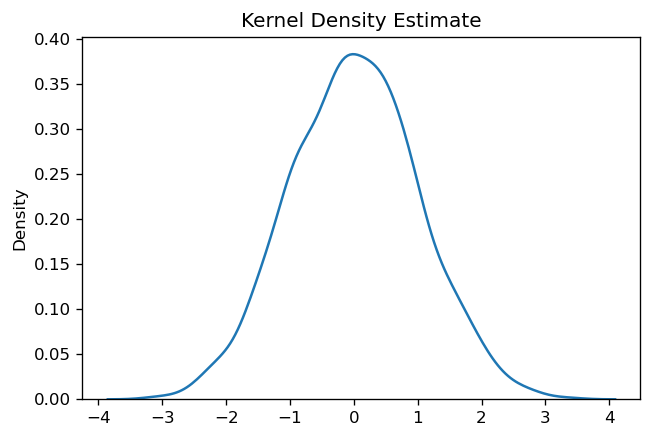

In [103]:
# make sure to import Seaborn after Matplotlib.  `sns` is the standard alias.
import matplotlib.pyplot as plt
import seaborn as sns

x = rng.normal(size=1000)

fig, ax = plt.subplots()
sns.kdeplot(x, ax=ax)
ax.set_title("Kernel Density Estimate")
# still use plt.show(); seaborn sends image data to Matplotlib.
# Matplotlib still handles all the saving/displaying.
plt.show()

Using the `hue=` option to do multiple plots side by side will automatically add a legend, based on the values of your `hue=` variable.

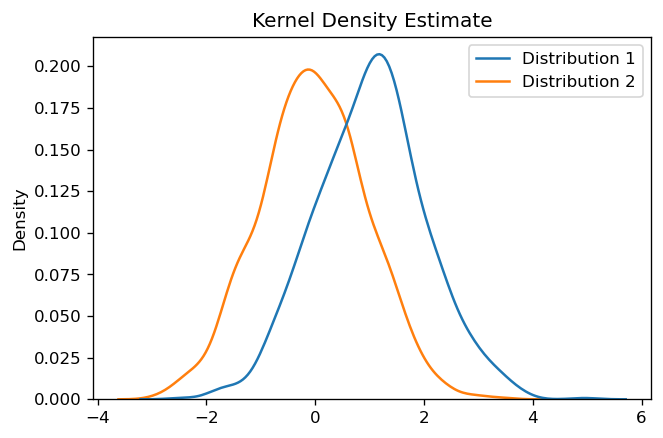

In [112]:
x = np.concatenate((
    rng.normal(size=1000) + 1,
    rng.normal(size=1000)
))

# Python trick: multiple a list by a number creates a new list with that many copies.
# ["hello"] * 3 -> ["hello", "hello", "hello"].
# list + list -> concatenation
z = ["Distribution 1"] * 1000 + ["Distribution 2"] * 1000
z = np.array(z)

fig, ax = plt.subplots()
sns.kdeplot(x, ax=ax, hue=z)
ax.set_title("Kernel Density Estimate")
plt.show()

I use KDE plots all the time--they're like a superpowered version of histograms for a lot of applications.  But sometimes you need a histogram.  In a lot of those cases, you also need to plot several groups' data on the same histogram, and have the bars not overlap.  This is possible, but a pain, to do in Matplotlib; Seaborn makes this easy.

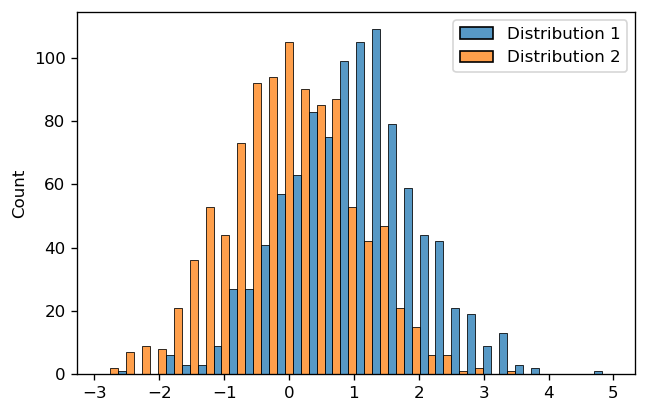

In [119]:
fig, ax = plt.subplots()
# multiple="dodge" -> no overlap between bars.
# Note: you do have to specify `x=` for this.
sns.histplot(x=x, hue=z, multiple="dodge", ax=ax)
plt.show()

There's one other core idea in Seaborn that's important.  It is designed to interoperate with `DataFrame`s from the `pandas` library--we'll be covering `pandas` next month in quite some depth.  Most Seaborn functions have a function signature that looks like this:

```python
sns.someplot(data, x, y, other arguments)```

where `data` is a `DataFrame`, and `x` and `y` are Numpy vectors.  So be careful if using Numpy to get your data into Seaborn: be sure you pass `x=` and `y=` by name, not by position!

Other than that, there really isn't too much more to Seaborn as far as basic concepts go.  The biggest thing Seaborn adds is some more useful, data-visualization-specific plotting tools, right out of the box.  Go look through their documentation and see what cool stuff they have--if you've understood the quick overview here, reading their documentation will mostly be an exercize in just learning what functions they have.